## General Processing

Workflow:
1. General filter
2. Outliers detection
3. Train and test set splitting
4. Missing values imputation
5. Add Score values
6. Output the train and test data




### Load master dataset

In [19]:
import pandas as pd
import os

from helpers_for_tasks import *
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport


In [3]:
output_path = r'D:\1_Teaching_Work_Folder\SMU\MITB_HealthcareAnalytics\Github\2024\Temp\Group Project-MIMIC\output_not_uploaded'
df_master = pd.read_csv(os.path.join(output_path, 'master_dataset_2024.csv'))

In [4]:
cols1=pd.DataFrame(df_master.columns)
cols1.nunique()

0    120
dtype: int64

In [5]:
colnames=list(df_master)
print(colnames)

['index', 'subject_id', 'hadm_id', 'stay_id', 'intime_ed', 'outtime_ed', 'anchor_age', 'gender', 'anchor_year', 'dod', 'admittime', 'dischtime', 'deathtime', 'race', 'edregtime', 'edouttime', 'insurance', 'in_year', 'age', 'before_ed_mortality', 'outcome_hospitalization', 'outcome_inhospital_mortality', 'ed_death', 'ed_los', 'intime_icu', 'outtime_icu', 'time_to_icu_transfer', 'outcome_icu_transfer_12h', 'outcome_critical', 'n_ed_30d', 'n_ed_90d', 'n_ed_365d', 'next_ed_visit_time', 'next_ed_visit_time_diff', 'outcome_ed_revisit_3d', 'n_hosp_30d', 'n_hosp_90d', 'n_hosp_365d', 'n_icu_30d', 'n_icu_90d', 'n_icu_365d', 'ed_los_hours', 'time_to_icu_transfer_hours', 'next_ed_visit_time_diff_days', 'triage_temperature', 'triage_heartrate', 'triage_resprate', 'triage_o2sat', 'triage_sbp', 'triage_dbp', 'triage_pain', 'triage_acuity', 'chiefcomplaint', 'chiefcom_chest_pain', 'chiefcom_abdominal_pain', 'chiefcom_headache', 'chiefcom_shortness_of_breath', 'chiefcom_back_pain', 'chiefcom_cough', 'c

In [6]:
profile_cols=['subject_id', 'hadm_id', 'stay_id', 
'time_to_icu_transfer_hours',
'gender', 'race', 'age', 
'before_ed_mortality', 'outcome_hospitalization', 'outcome_inhospital_mortality', 'ed_death', 'outcome_icu_transfer_12h', 'outcome_critical', 'outcome_ed_revisit_3d',
'ed_los_hours', 
'n_hosp_30d', 'n_hosp_90d', 'n_hosp_365d', 'n_icu_30d', 'n_icu_90d', 'n_icu_365d']
profiled_df = df_master[profile_cols].drop_duplicates()
profiled_df.columns.nunique()

21

In [7]:
df_profile=ProfileReport(profiled_df)
df_profile.to_file(os.path.join(output_path,"profiled_df_report.html"))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 49.73it/s]


In [8]:
pd.set_option('display.max_columns', 200) 
df_master.head()

,index,subject_id,hadm_id,stay_id,intime_ed,outtime_ed,anchor_age,gender,anchor_year,dod,admittime,dischtime,deathtime,race,edregtime,edouttime,insurance,in_year,age,before_ed_mortality,outcome_hospitalization,outcome_inhospital_mortality,ed_death,ed_los,intime_icu,outtime_icu,time_to_icu_transfer,outcome_icu_transfer_12h,outcome_critical,n_ed_30d,n_ed_90d,n_ed_365d,next_ed_visit_time,next_ed_visit_time_diff,outcome_ed_revisit_3d,n_hosp_30d,n_hosp_90d,n_hosp_365d,n_icu_30d,n_icu_90d,n_icu_365d,ed_los_hours,time_to_icu_transfer_hours,next_ed_visit_time_diff_days,triage_temperature,triage_heartrate,triage_resprate,triage_o2sat,triage_sbp,triage_dbp,triage_pain,triage_acuity,chiefcomplaint,chiefcom_chest_pain,chiefcom_abdominal_pain,chiefcom_headache,chiefcom_shortness_of_breath,chiefcom_back_pain,chiefcom_cough,chiefcom_nausea_vomiting,chiefcom_fever_chills,chiefcom_syncope,chiefcom_dizziness,cci_MI,cci_CHF,cci_PVD,cci_Stroke,cci_Dementia,cci_Pulmonary,cci_Rheumatic,cci_PUD,cci_Liver1,cci_DM1,cci_DM2,cci_Paralysis,cci_Renal,cci_Cancer1,cci_Liver2,cci_Cancer2,cci_HIV,eci_CHF,eci_Arrhythmia,eci_Valvular,eci_PHTN,eci_PVD,eci_HTN1,eci_HTN2,eci_Paralysis,eci_NeuroOther,eci_Pulmonary,eci_DM1,eci_DM2,eci_Hypothyroid,eci_Renal,eci_Liver,eci_PUD,eci_HIV,eci_Lymphoma,eci_Tumor2,eci_Tumor1,eci_Rheumatic,eci_Coagulopathy,eci_Obesity,eci_WeightLoss,eci_FluidsLytes,eci_BloodLoss,eci_Anemia,eci_Alcohol,eci_Drugs,eci_Psychoses,eci_Depression,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_dbp_last,ed_pain_last,n_med,n_medrecon
0,335314,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,52.0,F,2180.0,2180-09-09,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,Other,2180,52.0,False,True,False,False,0 days 04:13:00,NaN,NaN,NaN,False,False,0,0,0,2180-06-26 15:54:00,50 days 16:24:00,False,0,0,0,0,0,0,4.22,NaN,50.68,98.4,70.0,16.0,97.0,106.0,63.0,0.0,3.0,"Abd pain, Abdominal distention",False,True,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97.7,79.0,16.0,98.0,107.0,60.0,0.0,0.0,9.0
1,335315,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,52.0,F,2180.0,2180-09-09,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,Medicaid,2180,52.0,False,True,False,False,0 days 05:37:00,NaN,NaN,NaN,False,False,0,1,1,2180-07-22 16:24:00,25 days 18:53:00,False,0,1,1,0,0,0,5.62,NaN,25.79,98.9,88.0,18.0,97.0,116.0,88.0,10.0,3.0,Abdominal distention,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,97.9,86.0,17.0,93.0,96.0,57.0,5.0,3.0,12.0
2,335316,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,52.0,F,2180.0,2180-09-09,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,Medicaid,2180,52.0,False,True,False,False,0 days 13:30:00,2180-07-23 14:00:00,2180-07-23 23:50:47,0 days 08:06:00,True,True,1,2,2,2180-07-23 05:54:00,0 days 00:00:00,True,1,2,2,0,0,0,13.50,8.1,0.00,97.8,87.0,14.0,97.0,71.0,43.0,7.0,2.0,Hypotension,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,98.2,85.0,18.0,98.0,81.0,38.0,0.0,2.0,14.0
3,335317,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,52.0,F,2180.0,2180-09-09,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,Medicaid,2180,52.0,False,True,False,False,0 days 08:06:00,2180-07-23 14:00:00,2180-07-23 23:50:47,0 days 00:00:00,True,True,2,3,3,2180-08-05 20:58:00,13 days 06:58:00,False,1,2,2,0,0,0,8.10,0.0,13.29,98.7,77.0,16.0,98.0,96.0,50.0,13.0,2.0,"Abdominal distention, Abd pain, LETHAGIC",False,True,False,False,False,False,False,False,False,False,0,0,0,0,0,1,0,0,1,0,0,0,0,

### 1. General filter - Age, triage_acuity

In [9]:
df_master = df_master[df_master['age'] >= 18]

In [10]:
df_master = df_master[df_master['triage_acuity'].notnull()]
len(df_master)

440786

### 2. Outlier Detection 

In [11]:
# from mimic-extract
vitals_valid_range = {
    'temperature': {'outlier_low': 14.2, 'valid_low': 26, 'valid_high': 45, 'outlier_high':47},
    'heartrate': {'outlier_low': 0, 'valid_low': 0, 'valid_high': 350, 'outlier_high':390},
    'resprate': {'outlier_low': 0, 'valid_low': 0, 'valid_high': 300, 'outlier_high':330},
    'o2sat': {'outlier_low': 0, 'valid_low': 0, 'valid_high': 100, 'outlier_high':150},
    'sbp': {'outlier_low': 0, 'valid_low': 0, 'valid_high': 375, 'outlier_high':375},
    'dbp': {'outlier_low': 0, 'valid_low': 0, 'valid_high': 375, 'outlier_high':375},
    'pain': {'outlier_low': 0, 'valid_low': 0, 'valid_high': 10, 'outlier_high':10},
    'acuity': {'outlier_low': 1, 'valid_low': 1, 'valid_high': 5, 'outlier_high':5},
}

In [12]:
df_master = convert_temp_to_celcius(df_master)

In [13]:
display_outliers_count(df_master, vitals_valid_range)

,variable,< outlier_low,"[outlier_low, valid_low)","[valid_low, valid_high]","(valid_high, outlier_high]",> outlier_high
0,triage_temperature,512,29,422753,0,10
1,triage_heartrate,0,0,429925,0,7
2,triage_resprate,0,0,426511,0,4
3,triage_o2sat,0,0,426190,6,43
4,triage_sbp,0,0,428648,0,19
5,triage_dbp,0,0,427402,0,422
6,triage_pain,2,0,406223,0,11842
7,triage_acuity,0,0,440786,0,0
8,ed_temperature_last,671,43,416702,1,48
9,ed_heartrate_last,0,0,425135,0,0


In [14]:
df_master = remove_outliers(df_master, vitals_valid_range)

In [15]:
len(df_master)

440786

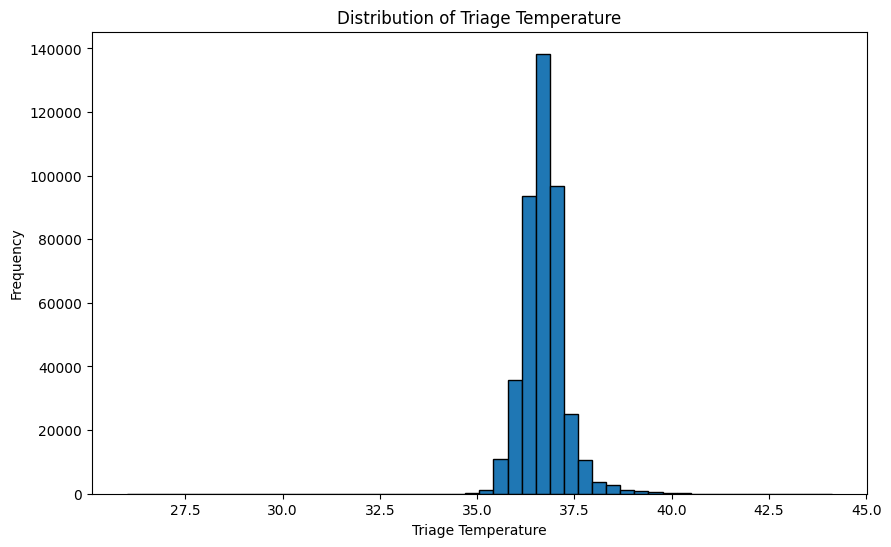

In [22]:
%matplotlib inline
# Plotting the histogram
df_master.hist(column='triage_temperature', bins=50, grid=False, edgecolor='black', figsize=(10, 6))

# Adding titles and labels
plt.title('Distribution of Triage Temperature')
plt.xlabel('Triage Temperature')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### 3. Dataset Split (train:0.8, test: 0.2, use seed to fix)

In [23]:
df_master.columns.nunique()

120

In [24]:
df_train=df_master.sample(frac=0.8,random_state=10) #random state is a seed value
df_test=df_master.drop(df_train.index)

In [25]:
len(df_train)

352629

In [26]:
len(df_test)

88157

In [27]:
df_train.head()

,index,subject_id,hadm_id,stay_id,intime_ed,outtime_ed,anchor_age,gender,anchor_year,dod,admittime,dischtime,deathtime,race,edregtime,edouttime,insurance,in_year,age,before_ed_mortality,outcome_hospitalization,outcome_inhospital_mortality,ed_death,ed_los,intime_icu,outtime_icu,time_to_icu_transfer,outcome_icu_transfer_12h,outcome_critical,n_ed_30d,n_ed_90d,n_ed_365d,next_ed_visit_time,next_ed_visit_time_diff,outcome_ed_revisit_3d,n_hosp_30d,n_hosp_90d,n_hosp_365d,n_icu_30d,n_icu_90d,n_icu_365d,ed_los_hours,time_to_icu_transfer_hours,next_ed_visit_time_diff_days,triage_temperature,triage_heartrate,triage_resprate,triage_o2sat,triage_sbp,triage_dbp,triage_pain,triage_acuity,chiefcomplaint,chiefcom_chest_pain,chiefcom_abdominal_pain,chiefcom_headache,chiefcom_shortness_of_breath,chiefcom_back_pain,chiefcom_cough,chiefcom_nausea_vomiting,chiefcom_fever_chills,chiefcom_syncope,chiefcom_dizziness,cci_MI,cci_CHF,cci_PVD,cci_Stroke,cci_Dementia,cci_Pulmonary,cci_Rheumatic,cci_PUD,cci_Liver1,cci_DM1,cci_DM2,cci_Paralysis,cci_Renal,cci_Cancer1,cci_Liver2,cci_Cancer2,cci_HIV,eci_CHF,eci_Arrhythmia,eci_Valvular,eci_PHTN,eci_PVD,eci_HTN1,eci_HTN2,eci_Paralysis,eci_NeuroOther,eci_Pulmonary,eci_DM1,eci_DM2,eci_Hypothyroid,eci_Renal,eci_Liver,eci_PUD,eci_HIV,eci_Lymphoma,eci_Tumor2,eci_Tumor1,eci_Rheumatic,eci_Coagulopathy,eci_Obesity,eci_WeightLoss,eci_FluidsLytes,eci_BloodLoss,eci_Anemia,eci_Alcohol,eci_Drugs,eci_Psychoses,eci_Depression,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_dbp_last,ed_pain_last,n_med,n_medrecon
403050,273532,18971123,21753872.0,37200982,2149-07-15 22:41:00,2149-07-16 06:27:00,45.0,F,2149.0,NaN,2149-07-16 04:10:00,2149-07-28 18:37:00,NaN,WHITE,2149-07-15 22:41:00,2149-07-16 06:27:00,Other,2149,45.0,False,True,False,False,0 days 07:46:00,NaN,NaN,NaN,False,False,0,1,1,2149-08-01 14:27:00,16 days 08:00:00,False,0,0,0,0,0,0,7.77,NaN,16.33,37.444444,102.0,19.0,100.0,133.0,88.0,0.0,2.0,Hypokalemia,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.333333,72.0,16.0,100.0,165.0,105.0,0.0,3.0,1.0
243905,253777,15439233,NaN,31867345,2159-12-20 19:43:00,2159-12-20 19:59:00,18.0,M,2159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2159,18.0,False,False,False,False,0 days 00:16:00,NaN,NaN,NaN,False,False,0,0,0,2160-02-11 01:14:00,52 days 05:15:00,False,0,0,0,0,0,0,0.27,NaN,52.22,37.111111,70.0,20.0,99.0,151.0,64.0,7.0,3.0,MVC,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.666667,60.0,16.0,100.0,132.0,70.0,7.0,1.0,0.0
239498,365291,15341533,NaN,30037900,2171-09-02 21:24:00,2171-09-02 21:27:00,40.0,F,2171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2171,40.0,False,False,False,False,0 days 00:03:00,NaN,NaN,NaN,False,False,0,0,0,NaN,NaN,False,0,0,0,0,0,0,0.05,NaN,NaN,37.555556,97.0,16.0,97.0,120.0,70.0,0.0,5.0,Med refill,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37.555556,95.0,18.0,98.0,113.0,67.0,0.0,0.0,0.0
156894,76261,13512582,NaN,38777853,2131-11-08 22:59:00,2131-11-08 23:04:00,70.0,F,2131.0,NaN,NaN,NaN,NaN,HISPANIC/LATINO - PUERTO RICAN,NaN,NaN,NaN,2131,70.0,False,False,False,False,0 days 00:05:00,NaN,NaN,NaN,False,False,0,0,0,2137-11-14 18:47:00,2197 days 19:43:00,False,0,0,0,0,0,0,0.08,NaN,2197.82,37.000000,58.0,16.0,100.0,155.0,44.0,10.0,3.0,ABD PAIN,False,True,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37.111111,51.0,18.0,96.0,173.0,63.0,2.0,3.0,2.0
348038,99718,17758321,NaN,35942414,2115-06-25 13:15:00,2115-06-25 13:38:00,50.0,M,2115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2115,50.0,False,False,False,False,0 days 00:23:00,NaN,NaN,NaN,False,False,1,1,1,NaN,NaN,False,0,0,0,0,0,0,0.38,Na

### 4. Missing Value imputation 

In [28]:
# Calculate Missing Values and Convert to DataFrame
df_missing_stats = df_train.isnull().sum().to_frame().T
# Calculate Percentage of Missing Values
df_missing_stats.loc[1] = df_missing_stats.loc[0] / len(df_train)
# Rename the Index for df_missing_stats
df_missing_stats.index = ['no. of missing values', 'percentage of missing values']
df_missing_stats

,index,subject_id,hadm_id,stay_id,intime_ed,outtime_ed,anchor_age,gender,anchor_year,dod,admittime,dischtime,deathtime,race,edregtime,edouttime,insurance,in_year,age,before_ed_mortality,outcome_hospitalization,outcome_inhospital_mortality,ed_death,ed_los,intime_icu,outtime_icu,time_to_icu_transfer,outcome_icu_transfer_12h,outcome_critical,n_ed_30d,n_ed_90d,n_ed_365d,next_ed_visit_time,next_ed_visit_time_diff,outcome_ed_revisit_3d,n_hosp_30d,n_hosp_90d,n_hosp_365d,n_icu_30d,n_icu_90d,n_icu_365d,ed_los_hours,time_to_icu_transfer_hours,next_ed_visit_time_diff_days,triage_temperature,triage_heartrate,triage_resprate,triage_o2sat,triage_sbp,triage_dbp,triage_pain,triage_acuity,chiefcomplaint,chiefcom_chest_pain,chiefcom_abdominal_pain,chiefcom_headache,chiefcom_shortness_of_breath,chiefcom_back_pain,chiefcom_cough,chiefcom_nausea_vomiting,chiefcom_fever_chills,chiefcom_syncope,chiefcom_dizziness,cci_MI,cci_CHF,cci_PVD,cci_Stroke,cci_Dementia,cci_Pulmonary,cci_Rheumatic,cci_PUD,cci_Liver1,cci_DM1,cci_DM2,cci_Paralysis,cci_Renal,cci_Cancer1,cci_Liver2,cci_Cancer2,cci_HIV,eci_CHF,eci_Arrhythmia,eci_Valvular,eci_PHTN,eci_PVD,eci_HTN1,eci_HTN2,eci_Paralysis,eci_NeuroOther,eci_Pulmonary,eci_DM1,eci_DM2,eci_Hypothyroid,eci_Renal,eci_Liver,eci_PUD,eci_HIV,eci_Lymphoma,eci_Tumor2,eci_Tumor1,eci_Rheumatic,eci_Coagulopathy,eci_Obesity,eci_WeightLoss,eci_FluidsLytes,eci_BloodLoss,eci_Anemia,eci_Alcohol,eci_Drugs,eci_Psychoses,eci_Depression,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_dbp_last,ed_pain_last,n_med,n_medrecon
no. of missing values,0.0,0.0,185633.000000,0.0,0.0,0.0,0.0,0.0,0.0,300659.000000,185754.000000,185754.000000,349441.000000,112684.000000,185820.000000,185820.000000,185754.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,328599.000000,328599.000000,328599.000000,0.0,0.0,0.0,0.0,0.0,168905.000000,168905.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,328599.000000,168905.000000,14356.000000,8666.000000,11366.000000,11694.000000,9689.000000,10685.000000,27598.000000,0.0,15.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19207.000000,12536.00000,12947.000000,21521.00000,12720.000000,12937.000000,37971.00000,0.0,0.0
percentage of missing values,0.0,0.0,0.526426,0.0,0.0,0.0,0.0,0.0,0.0,0.852621,0.526769,0.526769,0.990959,0.319554,0.526956,0.526956,0.526769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.931855,0.931855,0.931855,0.0,0.0,0.0,0.0,0.0,0.478988,0.478988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.931855,0.478988,0.040711,0.024575,0.032232,0.033162,0.027476,0.030301,0.078264,0.0,0.000043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054468,0.03555,0.036716,0.06103,0.036072,0.036687,0.10768,0.0,0.0


In [31]:
vitals_cols = [col for col in df_master.columns if len(col.split('_')) > 1 and 
                                                   col.split('_')[1] in vitals_valid_range and
                                                   col.split('_')[1] != 'acuity']
vitals_cols

['triage_temperature',
 'triage_heartrate',
 'triage_resprate',
 'triage_o2sat',
 'triage_sbp',
 'triage_dbp',
 'triage_pain',
 'ed_temperature_last',
 'ed_heartrate_last',
 'ed_resprate_last',
 'ed_o2sat_last',
 'ed_sbp_last',
 'ed_dbp_last',
 'ed_pain_last']

In [32]:
imputer = SimpleImputer(strategy='median')
df_train[vitals_cols] = imputer.fit_transform(df_train[vitals_cols])
df_test[vitals_cols] = imputer.transform(df_test[vitals_cols])

### 5. Add Score values

In [33]:
# test
add_triage_MAP(df_test) # add an extra variable MAP
add_score_CCI(df_test)
add_score_CART(df_test)
add_score_REMS(df_test)
add_score_NEWS(df_test)
add_score_NEWS2(df_test)
add_score_MEWS(df_test)

Variable 'add_triage_MAP' successfully added
Variable 'add_score_CCI' successfully added
Variable 'Score_CART' successfully added
Variable 'Score_REMS' successfully added
Variable 'Score_NEWS' successfully added
Variable 'Score_NEWS2' successfully added
Variable 'Score_MEWS' successfully added


In [34]:
# train
add_triage_MAP(df_train) # add an extra variable MAP
add_score_CCI(df_train)
add_score_CART(df_train)
add_score_REMS(df_train)
add_score_NEWS(df_train)
add_score_NEWS2(df_train)
add_score_MEWS(df_train)

Variable 'add_triage_MAP' successfully added
Variable 'add_score_CCI' successfully added
Variable 'Score_CART' successfully added
Variable 'Score_REMS' successfully added
Variable 'Score_NEWS' successfully added
Variable 'Score_NEWS2' successfully added
Variable 'Score_MEWS' successfully added


### 6. Output the train and test data

In [35]:
df_train.to_csv(os.path.join(output_path, 'train2.csv'), index=False)
df_test.to_csv(os.path.join(output_path, 'test2.csv'), index=False)